# Étapes importantes pour l'apprentissage d'un réseau convolutif 

In [9]:
from fastai.vision.all import *



path = untar_data(URLs.PETS)/'images'

def get_petname(x):
    return '-'.join(str(x).split('/')[-1].split('_')[:-1])


dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=get_petname,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

In [22]:
aug_transforms(size=224, min_scale=0.75)

[Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ,
 Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}:
 encodes: (TensorImage,object) -> encodes
 decodes: ,
 RandomResizedCropGPU -- {'size': (224, 224), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 decodes: ]

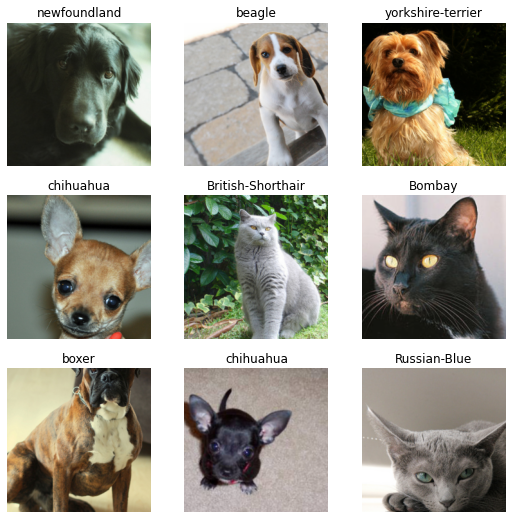

In [10]:
dls.show_batch()

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [13]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.465565,0.372250,0.126522,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.594101,0.287504,0.094723,00:56
1,0.404947,0.268171,0.079838,00:55
2,0.274403,0.231868,0.069689,00:55


## Interpretation des résultats

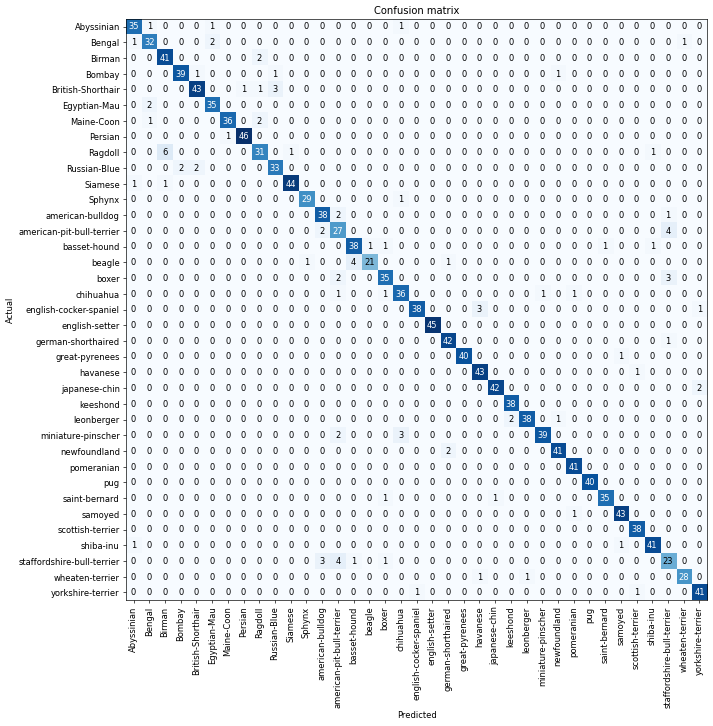

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
interp.most_confused(min_val=3)

[('Ragdoll', 'Birman', 6),
 ('american-pit-bull-terrier', 'staffordshire-bull-terrier', 4),
 ('beagle', 'basset-hound', 4),
 ('staffordshire-bull-terrier', 'american-pit-bull-terrier', 4),
 ('British-Shorthair', 'Russian-Blue', 3),
 ('boxer', 'staffordshire-bull-terrier', 3),
 ('english-cocker-spaniel', 'havanese', 3),
 ('miniature-pinscher', 'chihuahua', 3),
 ('staffordshire-bull-terrier', 'american-bulldog', 3)]

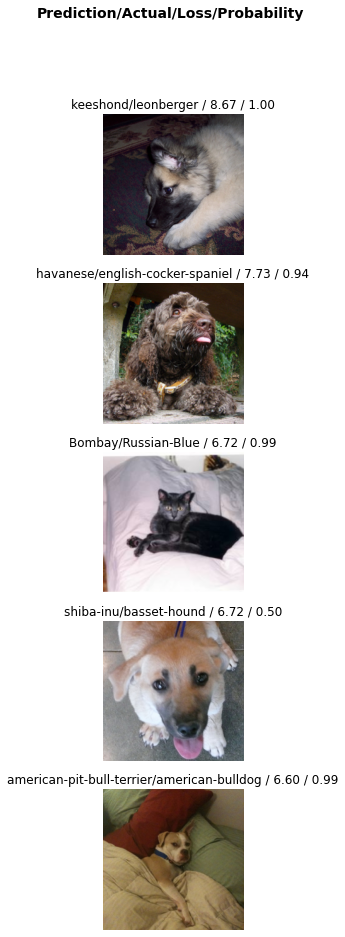

In [16]:
interp.plot_top_losses(5, nrows=5)

In [17]:
interp.print_classification_report()

                            precision    recall  f1-score   support

                Abyssinian       0.92      0.92      0.92        38
                    Bengal       0.89      0.89      0.89        36
                    Birman       0.85      0.95      0.90        43
                    Bombay       0.95      0.93      0.94        42
         British-Shorthair       0.93      0.90      0.91        48
              Egyptian-Mau       0.92      0.95      0.93        37
                Maine-Coon       0.97      0.92      0.95        39
                   Persian       0.98      0.98      0.98        47
                   Ragdoll       0.86      0.79      0.83        39
              Russian-Blue       0.89      0.89      0.89        37
                   Siamese       0.98      0.96      0.97        46
                    Sphynx       0.97      0.97      0.97        30
          american-bulldog       0.88      0.93      0.90        41
 american-pit-bull-terrier       0.71      0.82

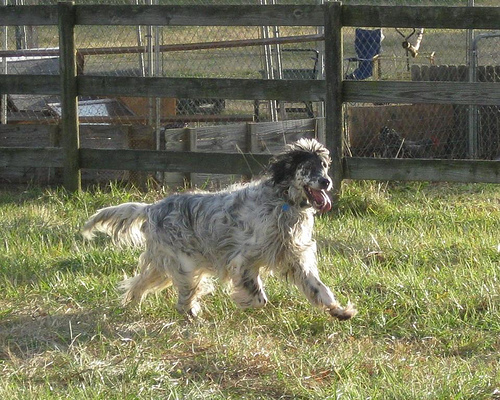

In [18]:
img = PILImage.create(dls.items[0])
img

In [ ]:
# ! pip install fastai2-extensions
# !pip install matplotlib-venn

In [19]:
from fastai2_extensions.interpret.all import *
interpx = ClassificationInterpretationEx.from_learner(learn)

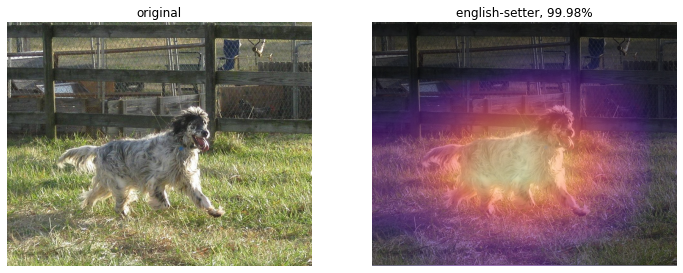

In [25]:
gcam = GradCam(learn, dls.items[0], None)
gcam.plot(full_size=True, plot_original=True, figsize=(12,6))

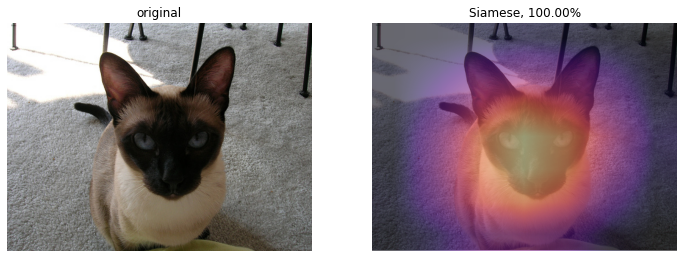

In [26]:
gcam = GradCam(learn, dls.items[27], None)
gcam.plot(full_size=True, plot_original=True, figsize=(12,6))